# Lecture 27: 
- Support Vector Machines
- Example: Handwritten Digit Recognition

__Reading Material:__
- [Machine learning: the problem setting](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#machine-learning-the-problem-setting)
- [Scikit-learn: Support Vector Machines (SVMs)](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#support-vector-machines-svms)

### Handwritten Digit Recognition

In this lecture, we will build a hand-written digit classifier using Support Vector Machines.

Read the section about Support Vector Machines (SVMs) from [this page](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#support-vector-machines-svms). The only thing you really need to understand is that an SVM tries to perform classification by determining hyperplanes (the multidimensional analog to a 2D plane) that separate samples from the different classes.

Read [Loading an example dataset](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#loading-an-example-dataset). The data is just a NumPy array. Let's reshape the first row of digits.data to the shape of digits.images[0] and use the appropriate NumPy function to confirm that all corresponding elements are close (or the same). 

### 手写数字识别

在本讲座中，我们将使用支持向量机构建一个手写数字分类器。

从 [此页面](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#support-vector-machines-svms) 阅读有关支持向量机 (SVM) 的部分。 您真正需要了解的唯一一件事是，SVM 试图通过确定将样本与不同类别分开的超平面（二维平面的多维模拟）来执行分类。

阅读[加载示例数据集](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#loading-an-example-dataset)。 数据只是一个 NumPy 数组。 让我们将 digits.data 的第一行重塑为 digits.images[0] 的形状，并使用适当的 NumPy 函数来确认所有对应元素都接近（或相同）。

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

In [2]:
print(type(digits.data))
print(digits.data.shape)  # number data:1797; number features: 64

<class 'numpy.ndarray'>
(1797, 64)


In [10]:
digits.data[0,:]  # 1 dimension shape
# same as digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
print(digits.images.shape)
digits.images[0]  # same as digits.images[0,:,;]

(1797, 8, 8)


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [15]:
import numpy as np
zero = digits.data[0,:].reshape((8,8))
# Returns True if two arrays are element-wise equal within a tolerance.
np.allclose(zero,digits.images[0])

# np.allclose(digits.data.reshape((-1,8,8)),digits.images)


True

In [22]:
digits.target.shape

(1797,)

Now we visualize (graphically) a few of the 8 × 8 arrays in digits.image using the appropriate function of matplotlib, i.e., you should produce a (preferably grayscale) image of a number.

现在我们使用 matplotlib 的适当函数（以图形方式）可视化 digits.image 中的一些 8 × 8 数组，即，您应该生成数字的（最好是灰度）图像。

3


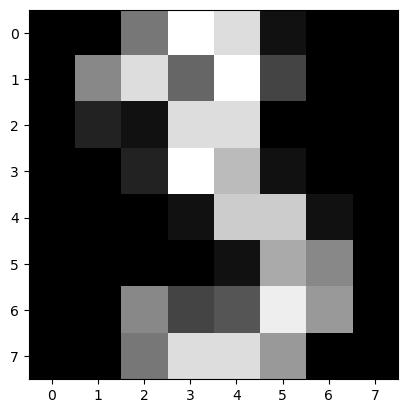

In [19]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[3], cmap = "gray")
print(digits.target[3])

1

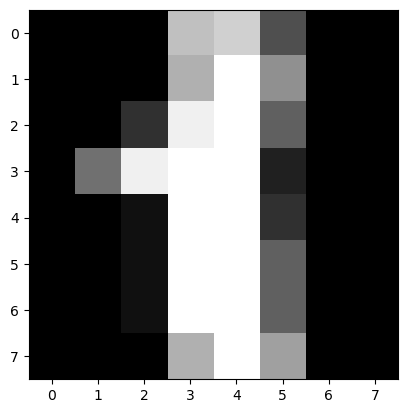

In [20]:
plt.imshow(digits.images[1], cmap = "gray")
digits.target[1] # belongs to class 1

3

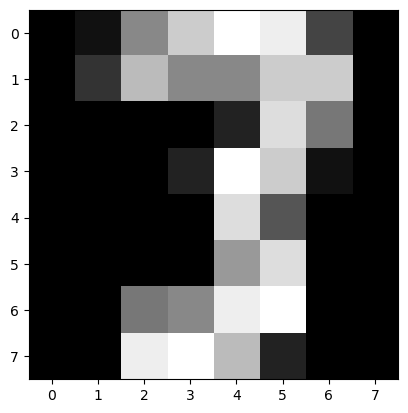

In [21]:
plt.imshow(digits.images[23], cmap = "gray")
digits.target[23] # 3: about neighbor

In [23]:
from sklearn import svm
clf = svm.SVC()
clf.fit(digits.data[:-1,:],digits.target[:-1])
clf.predict(digits.data[-1:])

array([8])

In [9]:
from sklearn import svm
# clf: classifier
clf = svm.SVC(gamma = 0.001, C= 100) 
# C is the Penalty parameter of the error term C是错误项的Penalty参数
# gamma is the parameter of a Gaussian Kernel to handle non-linear classification. gamma 是处理非线性分类的高斯核的参数。
clf.fit(digits.data[:-1,:],digits.target[:-1])
# digits.data[:-1,:]指代digits.dataNumPy 数组的所有行和列，最后一行除外，它由:-1切片符号指示。
# digits.target[:-1]指代digits.targetNumPy 数组中除最后一个元素之外的所有元素，这也由:-1切片符号表示。

clf.predict(digits.data[-1:])
''''
clf.predict(digits.data[-1:])clf是分类器模型 ( ) 对数据集最后一个数据点的预测digits。

digits.data[-1:]引用包含数组最后一行的 NumPy 数组digits.data, 如索引所示-1。表示:我们正在选择最后一行的所有列。

然后将分类器模型clf应用于此输入数据, 以预测最后一个数据点的目标变量(即数字标签)。分类器对象的方法predict()用于进行此预测。

总体而言, clf.predict(digits.data[-1:])返回数据集中最后一个数据点的预测数字标签digits
'''

array([8])

In [39]:
'''
digits.target[-1]指数据集中最后一个数据点的目标变量(即数字标签)digits。

在digits数据集中, NumPy 数组的每一行digits.data对应一个手写数字的图像, 对应的数字标签存储在数组中digits.target相同的行索引处。

因此digits.target[-1]返回数据集中最后一张图像的数字标签digits。
'''

digits.target[-1]

8

In [11]:
print(clf.predict(digits.data[-1:]))
# print(clf.predict(digits.data[-1])) # this doesn't work
print(digits.data[-1:].shape)  # this returns a 2D array
print(digits.data[-1].shape)   # these don't
print(digits.data[-1,:].shape)

[8]
(1, 64)
(64,)
(64,)


The digits data set is quite large. The example has you training using M = 1796 samples and testing on only one. When learning numbers, did you need to see 100 examples of each before you could recognize the digits 0-9? 

Now we modify the program to train using the first M = L - N samples (where L is the total number of samples) and test using the last N samples. 

Then we create a plot of the percentage of test digits accurately classified as a function of the number of digits M used as training data. 

数字数据集非常大。 该示例让您使用 M = 1796 个样本进行训练并仅在一个样本上进行测试。 在学习数字时，您需要看 100 个例子才能认出 0-9 数字吗？

现在我们修改程序以使用前 M = L - N 个样本（其中 L 是样本总数）进行训练，并使用最后 N 个样本进行测试。

然后，我们创建一个图表，显示准确分类的测试数字的百分比作为用作训练数据的数字 M 的函数。

Text(0, 0.5, 'Prediction Accuracy')

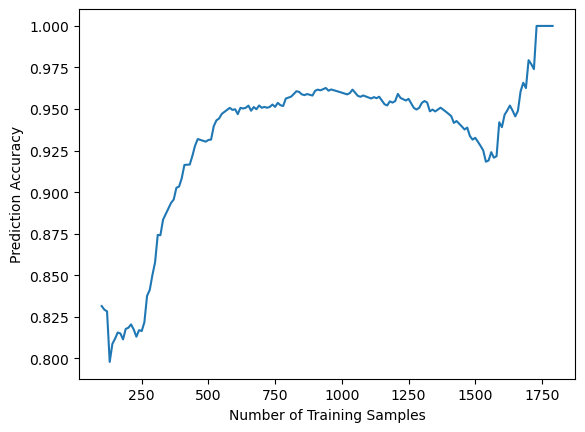

In [41]:
from sklearn import svm
clf = svm.SVC()

def accuracy(m):
    train_data = digits.data[:m,:]
    train_target = digits.target[:m]
    test_data = digits.data[m:]
    test_target = digits.target[m:]
    n = len(test_target)
    clf.fit(train_data,train_target)
    return sum(clf.predict(test_data)==test_target)/n

l = len(digits.target)
m = range(100,l,10)
p = [accuracy(i) for i in m]
plt.plot(m,p)
plt.xlabel("Number of Training Samples")
plt.ylabel("Prediction Accuracy")

While accuracy tends to improve with more training data, note that the plot is not strictly monotonic – increasing the amount of training data does not always improve the classification accuracy. Another important thing to note is that the particular samples used to train on can also affect the accuracy. 